In [19]:
import pandas as pd
import spacy
nlp = spacy.load("en_core_web_sm")
from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'false'
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook

In [20]:
df = pd.read_csv('results.csv')

In [21]:
# define function to lemmatize text
def lemmatize(text):
    text = text.lower()
    # use Spacy to parse text
    doc = nlp(text)
    # return list of lemmatized tokens
    return [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space and not token.is_digit]

In [22]:
# tokenize text and count word frequencies for each row in dataframe
word_counts = df['Embedded_text'].apply(lambda x: Counter(lemmatize(x)))

# combine word counts for all rows in dataframe
total_word_counts = sum(word_counts, Counter())

del total_word_counts['x000d']

# print top 10 most common words
for word, count in total_word_counts.most_common(20):
    print(f'{word}: {count}')

climate: 13260
change: 11771
reply: 1545
tweet: 1154
quote: 1112
new: 1105
people: 1098
year: 972
world: 892
need: 868
action: 793
say: 753
global: 715
like: 695
impact: 690
time: 688
fight: 673
energy: 622
right: 594
government: 568


In [23]:
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['Embedded_text']):
   proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [24]:
df['tokens'] = tokens
# I will apply the Dictionary Object from Gensim, which maps each word to their unique ID:
dictionary = Dictionary(df['tokens'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=50, num_topics=10, workers=4, passes=10)

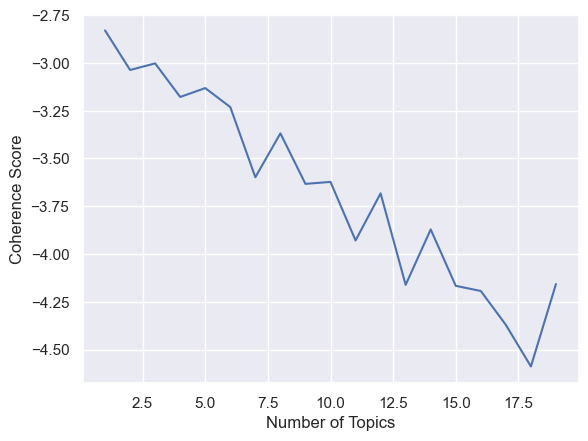

In [25]:
topics = []
score = []
for i in range(1, 20, 1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers=4, passes=10,
                             random_state=100)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    topics.append(i)
    score.append(cm.get_coherence())
_ = plt.plot(topics, score)
_ = plt.xlabel('Number of Topics')
_ = plt.ylabel('Coherence Score')
plt.show()

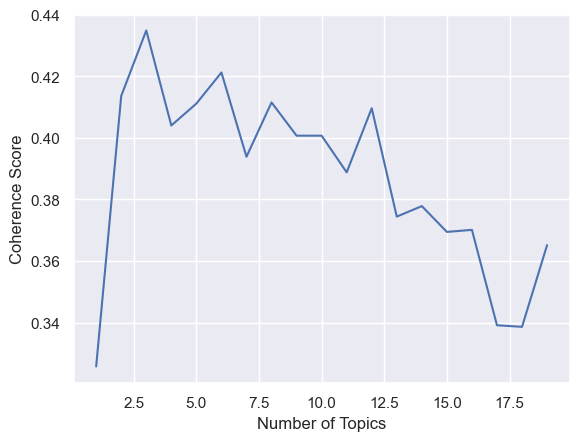

/Users/renevelasquez/Desktop/python_projects/climate-change-nlp/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


0    8246
1     622
2     135
3      36
4      11
Name: topic, dtype: int64


In [26]:
topics = []
score = []
for i in range(1, 20, 1):
    lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers=4, passes=10,
                             random_state=100)
    cm = CoherenceModel(model=lda_model, texts=df['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
    topics.append(i)
    score.append(cm.get_coherence())
_ = plt.plot(topics, score)
_ = plt.xlabel('Number of Topics')
_ = plt.ylabel('Coherence Score')
plt.show()
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=5, workers=4, passes=100)
lda_model.print_topics(-1)
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)
df['topic'] = [sorted(lda_model[corpus][text])[0][0] for text in range(len(df['tokens']))]
print(df.topic.value_counts())

In [27]:
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=100, num_topics=6, workers=4, passes=100)
lda_model.print_topics(-1)
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)

/Users/renevelasquez/Desktop/python_projects/climate-change-nlp/venv/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
